In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pets = pd.read_csv("data/dummy_pets.csv")
procedures = pd.read_csv("data/dummy_procedures.csv")

In [92]:
pets.head()
# pets.columns

procedures.head()
# procedures.columns

,companyid,locationid,state,patientid,procedure_code,production,description,week_start_date
0,V123289,1-Jan,MN,688,261,216.48,CHEM 17/LYTES/CBC (IN HOUSE),1/2/17
1,V123289,1-Jan,MN,653,678,211.60,CANINE BOARDING 50-99#,1/2/17
2,V123289,1-Jan,MN,384,GAB2505,20.50,GABAPENTIN 250MG5ML,1/2/17
3,V123289,1-Jan,MN,147,4790,51.00,INTERCEPTOR PLUS - 8.1-25LBS - SINGLE,1/2/17
4,V123289,1-Jan,MN,448,CADI60,148.50,CYTOPOINT INJECTION 50.1-60LBS,1/2/17


In [71]:
pets["age"].isnull().value_counts()
procedures["procedure_code"].isnull().value_counts() # This column has null values TODO
procedures["week_start_date"].isnull().value_counts()

week_start_date
False    607262
Name: count, dtype: int64

In [72]:
df = procedures[procedures["procedure_code"].isnull()]
df["description"].value_counts()
# C-SEC
# VIRTUAL BRAVECTO 9-22
procedures[procedures["description"]=="C-SEC"]
procedures[procedures["description"]=="VIRTUAL BRAVECTO 9-22"]
procedures[["description","procedure_code"]].value_counts()

# As the number of rows with null values in procecure code is 256, given total of 607262 i.e 0.042%, dropping the null values might affect the analysis as we are trying to fing maximum is various fields, where count is more close giving the maximum
# Hence instead of dropping the rows, we add a temp procedure code for "C-SEC" as CSEC and "VIRTUAL BRAVECTO 9-22" as VIRTBRAV

procedures[procedures["description"]=="C-SEC"]
procedures[procedures["description"]=="VIRTUAL BRAVECTO 9-22"]

# df.loc[df['c1'] == 'Value', 'c2'] = 10 referenced from stack overflow
procedures.loc[procedures["description"]=="C-SEC", "procedure_code"] = "CSEC"
procedures.loc[procedures["description"]=="VIRTUAL BRAVECTO 9-22", "procedure_code"] = "VIRTBRAV"

In [78]:
procedures[procedures["procedure_code"] == "CSEC"].value_counts()
procedures[procedures["procedure_code"] == "VIRTBRAV"].value_counts()
# Now we have replaced the null values and have a clean dataset of pets and procedures

companyid  locationid  state  patientid  procedure_code  production  description            week_start_date
V123289    1-Jan       MN     797        VIRTBRAV        71.0        VIRTUAL BRAVECTO 9-22  6/12/17            1
V133130    1-Jan       WA     171        VIRTBRAV        64.0        VIRTUAL BRAVECTO 9-22  7/31/17            1
                              195        VIRTBRAV        68.0        VIRTUAL BRAVECTO 9-22  2/20/17            1
           2-Jan       NV     138        VIRTBRAV        70.0        VIRTUAL BRAVECTO 9-22  7/24/17            1
                              260        VIRTBRAV        69.0        VIRTUAL BRAVECTO 9-22  4/27/20            1
                                                                                                              ..
V905124    1-Jan       NM     447        VIRTBRAV        68.0        VIRTUAL BRAVECTO 9-22  2/20/23            1
                              624        VIRTBRAV        66.0        VIRTUAL BRAVECTO 9-22  2/27/17  

In [114]:
# df = procedures.copy()
# df['week_start_date'] = pd.to_datetime(df['week_start_date'], format='%m/%d/%y')
# df['year'] = df['week_start_date'].dt.year
# df.head()
procedures['week_start_date'] = pd.to_datetime(procedures['week_start_date'], format='%m/%d/%y')
procedures['year'] = procedures['week_start_date'].dt.year
procedures.head()


,companyid,locationid,state,patientid,procedure_code,production,description,week_start_date,year
0,V123289,1-Jan,MN,688,261,216.48,CHEM 17/LYTES/CBC (IN HOUSE),2017-01-02,2017
1,V123289,1-Jan,MN,653,678,211.60,CANINE BOARDING 50-99#,2017-01-02,2017
2,V123289,1-Jan,MN,384,GAB2505,20.50,GABAPENTIN 250MG5ML,2017-01-02,2017
3,V123289,1-Jan,MN,147,4790,51.00,INTERCEPTOR PLUS - 8.1-25LBS - SINGLE,2017-01-02,2017
4,V123289,1-Jan,MN,448,CADI60,148.50,CYTOPOINT INJECTION 50.1-60LBS,2017-01-02,2017


### Tasks

### Practice Analysis 

o Count of unique companies.

o Count of unique practice locations.

o Find the practice with the most procedures in 2022, and plot their procedure counts 
over all years compared to the average of all practices.

o Find the practice with the most production in 2017, and plot their production totals 
over all years compared to the average of all practices.

In [89]:
unique_companies = procedures['companyid'].nunique()
print(unique_companies)

52


In [90]:
unique_practice_locations = procedures[['companyid', 'locationid']].drop_duplicates().shape[0]
print(unique_practice_locations)

98


In [119]:
procedures_2022 = procedures[procedures['year']==2022]
procedures_2022.head()
practice_most_procedures_2022 = procedures_2022.groupby(['companyid', 'locationid'])
practice_most_procedures_2022 = practice_most_procedures_2022.size().idxmax()
print(practice_most_procedures_2022)
# practice_most_procedures_2022[0]
# practice_most_procedures_2022[1]

('V888834', '2-Jan')


year
2017    1048
2018     682
2019     690
2020     740
2021     671
2022     891
2023     550
dtype: int64
year
2017    1933.367347
2018    1010.632653
2019     726.010204
2020     630.091837
2021     627.153061
2022     630.622449
2023     638.673469
dtype: float64


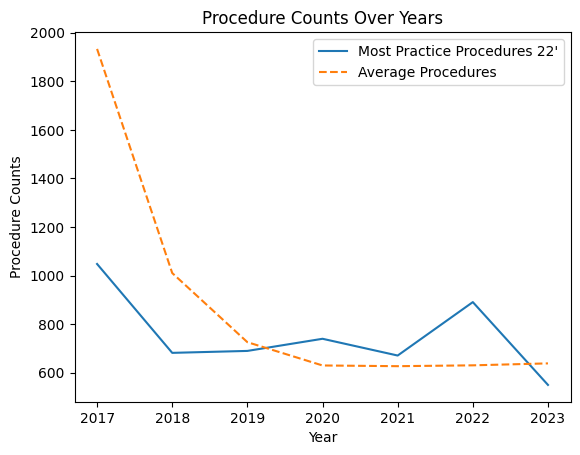

In [182]:
practice_procedures = procedures[(procedures['companyid'] == practice_most_procedures_2022[0]) & (procedures['locationid'] == practice_most_procedures_2022[1])]
yearly_counts = practice_procedures.groupby(["year"]).size()
print(yearly_counts)

avg_yearly_counts = procedures.groupby(["year", "companyid", "locationid"]).size().groupby(["year"]).mean()
print(avg_yearly_counts)

plt.plot(yearly_counts.index, yearly_counts.values, label='Most Practice Procedures 22\'')
plt.plot(avg_yearly_counts.index, avg_yearly_counts.values, label='Average Procedures',  linestyle='--')
plt.xlabel('Year')
plt.ylabel('Procedure Counts')
plt.title('Procedure Counts Over Years')
plt.legend()
plt.show()

In [183]:
procedures_2017 = procedures[procedures["year"]==2017]
practice_most_production_2017 = procedures_2017.groupby(['companyid', 'locationid'])['production'].sum().idxmax()
print(practice_most_production_2017)

('V822321', '2-Jan')


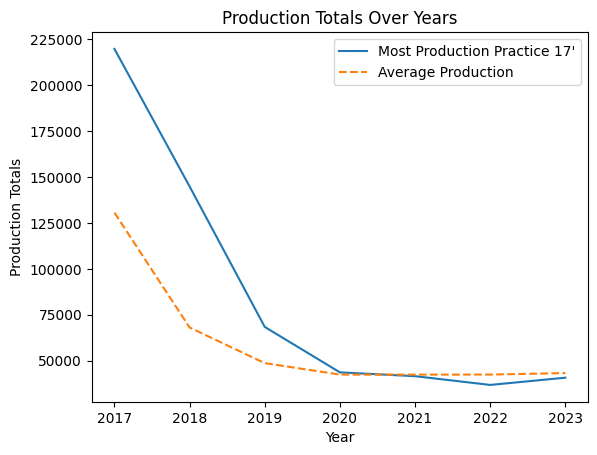

In [184]:
practice_production = procedures[(procedures['companyid'] == practice_most_production_2017[0]) & (procedures['locationid'] == practice_most_production_2017[1])]
yearly_production = practice_production.groupby(["year"])['production'].sum()
# yearly_production

avg_yearly_production = procedures.groupby(["year","companyid", "locationid"])['production'].sum().groupby(["year"]).mean()
# avg_yearly_production

plt.plot(yearly_production.index, yearly_production.values, label='Most Production Practice 17\'')
plt.plot(avg_yearly_production.index, avg_yearly_production.values, label='Average Production',  linestyle='--')
plt.xlabel('Year')
plt.ylabel('Production Totals')
plt.title('Production Totals Over Years')
plt.legend()
plt.show()

##### Patient analysis

o Number of unique pets in our database.

o Average number of pets per owner.

o Find the owner with the most pets, and provide a table with details on each pet.

o Find the owner with the most clinic visits (number of procedures), and provide a table 
containing details of all of that owner’s visits.

o Provide analysis of Cats vs. Dogs based on overall procedure history.

In [185]:
unique_pets = pets['patientid'].nunique()
print(unique_pets)

900


In [189]:
avg_pets_per_owner = pets.groupby('clientid').size().mean()
print(int(avg_pets_per_owner))

220


In [194]:
owner_most_pets = pets.groupby('clientid').size().idxmax()
owner_most_pets_details = pets[pets['clientid'] == owner_most_pets]
print(owner_most_pets)
owner_most_pets_details

108


,companyid,locationid,patientid,clientid,breed,species,age
47,V123289,1-Jan,848,108,TOY POODLE,CANINE,22
97,V123289,1-Jan,509,108,PITBULL,CANINE,12
1208,V133130,1-Jan,299,108,SHIH TZU,CANINE,9
2305,V133130,2-Jan,412,108,DACHSHUND,CANINE,7
2409,V133130,2-Jan,714,108,DOMESTIC LONG HAIR,FELINE,21
...,...,...,...,...,...,...,...
87201,V963087,1-Jan,918,108,DOMESTIC SHORTHAIR,FELINE,24
87510,V963087,1-Jan,615,108,RETRIEVER LABRADOR MIX,CANINE,8
87622,V963087,1-Jan,407,108,QUARTER HORSE,EQUINE,10
87787,V963087,1-Jan,626,108,TERRIER JACK RUSSELL MIX,CANINE,16


In [ ]:
procedures_with_client = procedures.merge(pets[['patientid', 'clientid']], on='patientid')
owner_most_visits = procedures_with_client.groupby('clientid').size().idxmax()
owner_most_visits_details = procedures_with_client[procedures_with_client['clientid'] == owner_most_visits]

##### Procedure Analysis

o Plot the 10 most common procedure codes by count.

o Provide analysis on the most common procedure code.

o Build a procedure dataset for all procedures containing keyword “IDEXX” and provide 
analysis on this subset.

procedure_code
101     2808
2360    2673
1       1658
OSHA    1589
EXAM    1455
NT      1398
C303    1372
100     1369
401     1315
MW      1315
Name: count, dtype: int64


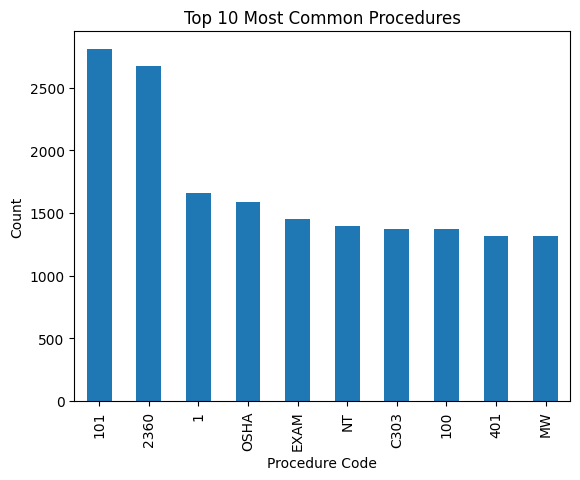

In [198]:
top_10_procedures = procedures['procedure_code'].value_counts().head(10)
print(top_10_procedures)
top_10_procedures.plot(kind='bar')
plt.xlabel('Procedure Code')
plt.ylabel('Count')
plt.title('Top 10 Most Common Procedures')
plt.show()

In [199]:
most_common_procedure_code = procedures['procedure_code'].value_counts().idxmax()
print(most_common_procedure_code)
most_common_procedure_details = procedures[procedures['procedure_code'] == most_common_procedure_code]
most_common_procedure_details

101


,companyid,locationid,state,patientid,procedure_code,production,description,week_start_date,year
385,V123289,1-Jan,MN,800,101,30.00,DA2LPPARVO PUPPY (10-13 WKS OLD),2017-05-01,2017
844,V123289,1-Jan,MN,747,101,96.50,EXAM,2017-09-04,2017
852,V123289,1-Jan,MN,885,101,76.00,OFFICE- REGULAR EXAM,2017-09-11,2017
899,V123289,1-Jan,MN,572,101,95.50,EXAM,2017-09-25,2017
921,V123289,1-Jan,MN,822,101,30.88,OFFICE VISITEXAM,2017-10-02,2017
...,...,...,...,...,...,...,...,...,...
605045,V963087,1-Jan,ID,480,101,78.00,OFFICE- REGULAR EXAM,2020-06-15,2020
606264,V963087,1-Jan,ID,450,101,102.00,OFFICE VISIT SICK PET,2022-04-04,2022
606630,V963087,1-Jan,ID,837,101,20.04,EXAMINATION CONSULTATION,2022-11-28,2022
606995,V963087,1-Jan,ID,930,101,84.00,OFFICE- REGULAR EXAM,2023-07-03,2023


In [202]:
idexx_procedures = procedures[procedures['description'].str.contains('IDEXX')]
idexx_procedures

,companyid,locationid,state,patientid,procedure_code,production,description,week_start_date,year
10,V123289,1-Jan,MN,332,I910,71.00,IDEXX URINALYSIS,2017-01-02,2017
25,V123289,1-Jan,MN,749,24639,88.57,IDEXX FECAL DX PROFILE W GIARDIA,2017-01-09,2017
159,V123289,1-Jan,MN,445,I910,71.00,IDEXX URINALYSIS,2017-02-20,2017
301,V123289,1-Jan,MN,128,IDX105,61.81,IDEXX CBC,2017-04-03,2017
389,V123289,1-Jan,MN,294,490IDX,40.50,IDEXX HEARTWORM SNAP TEST,2017-05-01,2017
...,...,...,...,...,...,...,...,...,...
607030,V963087,1-Jan,ID,575,27013,76.00,CBC - IDEXX,2023-07-31,2023
607077,V963087,1-Jan,ID,507,3231,61.96,FECAL O&P PRIMATE - IDEXX #320438,2023-08-28,2023
607078,V963087,1-Jan,ID,269,IL5010,47.49,IDEXX OVA AND PARASITES 3 OR MORE,2023-08-28,2023
607123,V963087,1-Jan,ID,601,1189,129.00,IDEXX CUSTOM PROFILE 212-STANDARD CB,2023-10-02,2023
